<a href="https://colab.research.google.com/github/rebeccahe1998/Genre_Prediction/blob/main/music_genre_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [183]:
import pandas as pd


In [184]:
train = pd.read_csv("train.csv", header=0, index_col=None)
train

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre
0,0.761863,0.975094,7,-7.542542,1,-0.017051,-0.046122,0.809700,0.132809,0.031503,143.830571,369867.93320,4,psytrance
1,0.473848,0.930957,1,-5.996011,1,0.005192,-0.000086,0.622096,0.523871,0.222850,165.794330,317910.45350,4,dnb
2,0.672960,0.960843,7,-7.619419,1,0.025662,0.062044,0.514183,0.113112,-0.017526,135.681140,357243.12690,4,psytrance
3,0.669152,0.743276,6,-6.627121,0,0.064931,0.009660,0.397849,0.414650,0.037380,144.207199,409893.14080,4,trance
4,0.778987,0.604103,9,-7.864958,1,0.109415,-0.020442,1.010180,0.120606,-0.014750,135.294668,487481.68120,4,techno
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35954,0.656216,0.448807,8,-12.329690,1,0.063894,0.153623,0.138106,0.062590,0.060258,114.483352,80741.86242,4,Underground Rap
35955,0.882615,0.663964,6,-8.774789,0,0.242777,0.181880,0.073613,0.088597,0.255773,131.581683,379222.94090,4,other
35956,0.660423,0.779153,0,-3.703661,1,0.359540,0.298144,0.073090,0.116138,0.519285,104.913715,242815.59340,4,RnB
35957,0.178196,0.990031,0,-6.099041,1,0.090615,0.027803,1.042920,0.760333,0.226083,140.500232,319213.33520,4,trance


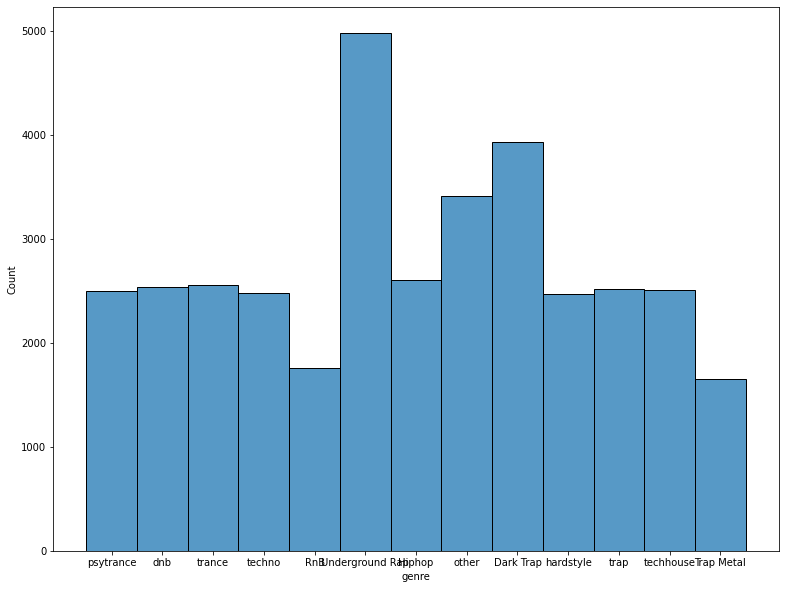

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(13,10))
sns.histplot(train.genre)

In [185]:
#! pip install scikit-multilearn
#from skmultilearn.problem_transform import BinaryRelevance
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

In [186]:
from sklearn.ensemble import RandomForestClassifier as rf
from sklearn.linear_model import LogisticRegression as reg

In [187]:
y = pd.DataFrame(train.genre)
x = train.drop(columns=['genre'], inplace=False)


In [188]:
yy=pd.get_dummies(y)
yy


,genre_Dark Trap,genre_Hiphop,genre_RnB,genre_Trap Metal,genre_Underground Rap,genre_dnb,genre_hardstyle,genre_other,genre_psytrance,genre_techhouse,genre_techno,genre_trance,genre_trap
0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35954,0,0,0,0,1,0,0,0,0,0,0,0,0
35955,0,0,0,0,0,0,0,1,0,0,0,0,0
35956,0,0,1,0,0,0,0,0,0,0,0,0,0
35957,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
df = pd.concat([x,yy],axis=1)
from sklearn.model_selection import train_test_split


In [201]:
df.columns = df.columns.str.replace(' ', '_')
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre_Dark_Trap,genre_Hiphop,genre_RnB,genre_Trap_Metal,genre_Underground_Rap,genre_dnb,genre_hardstyle,genre_other,genre_psytrance,genre_techhouse,genre_techno,genre_trance,genre_trap
0,0.761863,0.975094,7,-7.542542,1,-0.017051,-0.046122,0.809700,0.132809,0.031503,143.830571,369867.93320,4,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0.473848,0.930957,1,-5.996011,1,0.005192,-0.000086,0.622096,0.523871,0.222850,165.794330,317910.45350,4,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0.672960,0.960843,7,-7.619419,1,0.025662,0.062044,0.514183,0.113112,-0.017526,135.681140,357243.12690,4,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0.669152,0.743276,6,-6.627121,0,0.064931,0.009660,0.397849,0.414650,0.037380,144.207199,409893.14080,4,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0.778987,0.604103,9,-7.864958,1,0.109415,-0.020442,1.010180,0.120606,-0.014750,135.294668,487481.68120,4,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35954,0.656216,0.448807,8,-12.329690,1,0.063894,0.153623,0.138106,0.062590,0.060258,114.483352,80741.86242,4,0,0,0,0,1,0,0,0,0,0,0,0,0
35955,0.882615,0.663964,6,-8.774789,0,0.242777,0.181880,0.073613,0.088597,0.255773,131.581683,379222.94090,4,0,0,0,0,0,0,0,1,0,0,0,0,0
35956,0.660423,0.779153,0,-3.703661,1,0.359540,0.298144,0.073090,0.116138,0.519285,104.913715,242815.59340,4,0,0,1,0,0,0,0,0,0,0,0,0,0
35957,0.178196,0.990031,0,-6.099041,1,0.090615,0.027803,1.042920,0.760333,0.226083,140.500232,319213.33520,4,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
train, test = train_test_split(df, random_state=42, test_size=0.30, shuffle=True)
x_train = train.iloc[0:,0:x.shape[1]]


In [ ]:
y_train = train.iloc[0:,x.shape[1]:]


In [204]:
x_test = test.iloc[0:,0:x.shape[1]]
y_test = test.iloc[0:,x.shape[1]:]

In [205]:
y_test

,genre_Dark_Trap,genre_Hiphop,genre_RnB,genre_Trap_Metal,genre_Underground_Rap,genre_dnb,genre_hardstyle,genre_other,genre_psytrance,genre_techhouse,genre_techno,genre_trance,genre_trap
27297,0,0,0,0,0,0,0,0,0,0,1,0,0
2969,0,0,1,0,0,0,0,0,0,0,0,0,0
3578,0,0,0,0,0,0,1,0,0,0,0,0,0
35496,0,0,0,0,0,0,1,0,0,0,0,0,0
7708,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27316,0,0,0,0,0,0,0,0,0,0,0,1,0
27917,0,0,0,0,0,0,1,0,0,0,0,0,0
28882,0,0,0,0,0,0,0,0,0,1,0,0,0
31014,0,0,0,0,0,0,0,1,0,0,0,0,0


# first label

---



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
# Using pipeline for applying logistic regression and one vs rest classifier

rfc = rf(n_estimators=279, max_depth=4,n_jobs=-1,verbose=False)
for category in y_test.columns:
    print('**Processing {} comments...**'.format(category))
    
    # Training logistic regression model on train data
    rfc.fit(x_train,y_train[category])
    
    # calculating test accuracy
    prediction = rfc.predict(x_test)
    print('Test accuracy is {}'.format(roc_auc_score(y_test[category], prediction)))
    print("\n")

In [272]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
# predict the first catogory
params = {'n_estimators':[280,300],'max_depth':[40,45,50]}
rf = RandomForestClassifier(random_state=42)
rf_grid = GridSearchCV(estimator=rf, param_grid=params, cv=3, n_jobs=-1)
rf_grid.fit(x_train,y_train.iloc[:,0])
print(rf_grid.best_params_)


{'max_depth': 45, 'n_estimators': 300}


In [273]:
pred0 = rf_grid.predict_proba(x_test.values)
pred_0 = [row[1] for row in pred0]
roc_auc_score(y_test.iloc[:,0],pred_0)

0.8411420956231015

In [275]:
p0 = rf_grid.predict(x_test.values)
accuracy_score(y_test.iloc[:,0], p0)

0.9043381535038932

# second label


---



In [276]:
params = {'n_estimators':[225,250,270],'max_depth':[30,45,50]}
rf = RandomForestClassifier(random_state=42)
rf_grid = GridSearchCV(estimator=rf, param_grid=params, cv=3, n_jobs=-1)
rf_grid.fit(x_train,y_train.iloc[:,1]) # change this for different label
print(rf_grid.best_params_)
pred1 = rf_grid.predict_proba(x_test.values.tolist())
pred_1 = [row[1] for row in pred1]


{'max_depth': 30, 'n_estimators': 225}


In [277]:
print(roc_auc_score(y_test.iloc[:,1],pred_1)) # change this for different label
p1 = rf_grid.predict(x_test.values)
print(accuracy_score(y_test.iloc[:,1], p1))  # change this for different label

0.8787234171366487
0.9350203930292919


# 3rd


---



In [278]:
params = {'n_estimators':[225,250,270],'max_depth':[30,45,50]}
rf = RandomForestClassifier(random_state=42)
rf_grid = GridSearchCV(estimator=rf, param_grid=params, cv=3, n_jobs=-1)
rf_grid.fit(x_train,y_train.iloc[:,2]) # change this for different label
print(rf_grid.best_params_)
pred2 = rf_grid.predict_proba(x_test.values.tolist())
pred_2 = [row[1] for row in pred2]


{'max_depth': 45, 'n_estimators': 270}


In [279]:
print(roc_auc_score(y_test.iloc[:,2],pred_2)) # change this for different label
p2 = rf_grid.predict(x_test.values)
print(accuracy_score(y_test.iloc[:,2], p2))  # change this for different label

0.8761554931970096
0.9517982944011865


# 4 label, index=3

In [286]:
params = {'n_estimators':[225,250,270],'max_depth':[30,45,50]}
rf = RandomForestClassifier(random_state=42)
rf_grid = GridSearchCV(estimator=rf, param_grid=params, cv=3, n_jobs=-1)
rf_grid.fit(x_train,y_train.iloc[:,3]) # change this for different label
print(rf_grid.best_params_)
pred3 = rf_grid.predict_proba(x_test.values.tolist())
pred_3 = [row[1] for row in pred3]

{'max_depth': 45, 'n_estimators': 225}


In [287]:
print(roc_auc_score(y_test.iloc[:,3],pred_3)) # change this for different label
p3 = rf_grid.predict(x_test.values)
print(accuracy_score(y_test.iloc[:,3], p3))  # change this for different label

0.8637031778510877
0.9513348164627363


# label 5, index4

In [289]:
params = {'n_estimators':[225,250,400],'max_depth':[20,30,70]}
rf = RandomForestClassifier(random_state=42)
rf_grid = GridSearchCV(estimator=rf, param_grid=params, cv=3, n_jobs=-1)
rf_grid.fit(x_train,y_train.iloc[:,4]) # change this for different label
print(rf_grid.best_params_)
pred4 = rf_grid.predict_proba(x_test.values.tolist())
pred_4 = [row[1] for row in pred4]
print(roc_auc_score(y_test.iloc[:,4],pred_4)) # change this for different label
p4 = rf_grid.predict(x_test.values)
print(accuracy_score(y_test.iloc[:,4], p4))  # change this for different label

{'max_depth': 30, 'n_estimators': 250}
0.8714648669738407
0.8619762699295513


# label 6, index5

In [290]:
params = {'n_estimators':[200,250,300],'max_depth':[20,35,40,50,70]}
rf = RandomForestClassifier(random_state=42)
rf_grid = GridSearchCV(estimator=rf, param_grid=params, cv=3, n_jobs=-1)
rf_grid.fit(x_train,y_train.iloc[:,5]) # change this for different label
print(rf_grid.best_params_)
pred5 = rf_grid.predict_proba(x_test.values.tolist())
pred_5 = [row[1] for row in pred5]
print(roc_auc_score(y_test.iloc[:,5],pred_5)) # change this for different label
p5 = rf_grid.predict(x_test.values)
print(accuracy_score(y_test.iloc[:,5], p5))  # change this for different label

{'max_depth': 20, 'n_estimators': 200}
0.9884839531244068
0.9777530589543938


# label 7. index 6

In [291]:
params = {'n_estimators':[200,250,300],'max_depth':[20,35,40,50,70]}
rf = RandomForestClassifier(random_state=42)
rf_grid = GridSearchCV(estimator=rf, param_grid=params, cv=3, n_jobs=-1)
rf_grid.fit(x_train,y_train.iloc[:,6]) # change this for different label
print(rf_grid.best_params_)
pred6 = rf_grid.predict_proba(x_test.values.tolist())
pred_6 = [row[1] for row in pred6]
print(roc_auc_score(y_test.iloc[:,6],pred_6)) # change this for different label
p6 = rf_grid.predict(x_test.values)
print(accuracy_score(y_test.iloc[:,6], p6))  # change this for different label

{'max_depth': 35, 'n_estimators': 200}
0.9592932641372004
0.9506859473489062


# label8 id7

In [292]:
params = {'n_estimators':[200,250,300],'max_depth':[20,35,40,50,70]}
rf = RandomForestClassifier(random_state=42)
rf_grid = GridSearchCV(estimator=rf, param_grid=params, cv=3, n_jobs=-1)
rf_grid.fit(x_train,y_train.iloc[:,7]) # change this for different label
print(rf_grid.best_params_)
pred7 = rf_grid.predict_proba(x_test.values.tolist())
pred_7 = [row[1] for row in pred7]
print(roc_auc_score(y_test.iloc[:,7],pred_7)) # change this for different label
p7 = rf_grid.predict(x_test.values)
print(accuracy_score(y_test.iloc[:,7], p7))  # change this for different label

{'max_depth': 35, 'n_estimators': 300}
0.8690771232782876
0.9218576195773082


# label 9, id 8

In [293]:
params = {'n_estimators':[200,250,300],'max_depth':[20,35,40,50,70]}
rf = RandomForestClassifier(random_state=42)
rf_grid = GridSearchCV(estimator=rf, param_grid=params, cv=3, n_jobs=-1)
rf_grid.fit(x_train,y_train.iloc[:,8]) # change this for different label
print(rf_grid.best_params_)
pred8 = rf_grid.predict_proba(x_test.values.tolist())
pred_8 = [row[1] for row in pred8]
print(roc_auc_score(y_test.iloc[:,8],pred_8)) # change this for different label
p8 = rf_grid.predict(x_test.values)
print(accuracy_score(y_test.iloc[:,8], p8))  # change this for different label

{'max_depth': 35, 'n_estimators': 200}
0.9769881719329595
0.9682054134223211


# label 10, id9

In [294]:
params = {'n_estimators':[200,250,300],'max_depth':[20,35,40,50,70]}
rf = RandomForestClassifier(random_state=42)
rf_grid = GridSearchCV(estimator=rf, param_grid=params, cv=3, n_jobs=-1)
rf_grid.fit(x_train,y_train.iloc[:,9]) # change this for different label
print(rf_grid.best_params_)
pred9 = rf_grid.predict_proba(x_test.values.tolist())
pred_9 = [row[1] for row in pred9]
print(roc_auc_score(y_test.iloc[:,9],pred_9)) # change this for different label
p9 = rf_grid.predict(x_test.values)
print(accuracy_score(y_test.iloc[:,9], p9))  # change this for different label

{'max_depth': 35, 'n_estimators': 300}
0.9792521827344665
0.96403411197627


# label 11, id10

In [295]:
params = {'n_estimators':[200,250,300],'max_depth':[20,35,40,50,70]}
rf = RandomForestClassifier(random_state=42)
rf_grid = GridSearchCV(estimator=rf, param_grid=params, cv=3, n_jobs=-1)
rf_grid.fit(x_train,y_train.iloc[:,10]) # change this for different label
print(rf_grid.best_params_)
pred10 = rf_grid.predict_proba(x_test.values.tolist())
pred_10 = [row[1] for row in pred10]
print(roc_auc_score(y_test.iloc[:,10],pred_10)) # change this for different label
p10 = rf_grid.predict(x_test.values)
print(accuracy_score(y_test.iloc[:,10], p10))  # change this for different label

{'max_depth': 20, 'n_estimators': 300}
0.9795081664599209
0.9632925472747497


# label 12, id11


---



In [296]:
params = {'n_estimators':[200,250,300],'max_depth':[20,35,40,50,70]}
rf = RandomForestClassifier(random_state=42)
rf_grid = GridSearchCV(estimator=rf, param_grid=params, cv=3, n_jobs=-1)
rf_grid.fit(x_train,y_train.iloc[:,11]) # change this for different label
print(rf_grid.best_params_)
pred11 = rf_grid.predict_proba(x_test.values.tolist())
pred_11 = [row[1] for row in pred11]
print(roc_auc_score(y_test.iloc[:,11],pred_11)) # change this for different label
p11 = rf_grid.predict(x_test.values)
print(accuracy_score(y_test.iloc[:,11], p11))  # change this for different label

{'max_depth': 20, 'n_estimators': 300}
0.9549572561306984
0.946329254727475


# label 13, id 12

---



In [299]:
params = {'n_estimators':[200,250,300],'max_depth':[20,35,40,50,70]}
rf = RandomForestClassifier(random_state=42)
rf_grid = GridSearchCV(estimator=rf, param_grid=params, cv=3, n_jobs=-1)
rf_grid.fit(x_train,y_train.iloc[:,12]) # change this for different label
print(rf_grid.best_params_)
pred12 = rf_grid.predict_proba(x_test.values.tolist())
pred_12 = [row[1] for row in pred12]
print(roc_auc_score(y_test.iloc[:,12],pred_12)) # change this for different label
p12 = rf_grid.predict(x_test.values)
print(accuracy_score(y_test.iloc[:,12], p12))  # change this for different label

{'max_depth': 35, 'n_estimators': 300}
0.9557012308879522
0.9575454208379681


In [300]:
df=pd.DataFrame((pred_0, pred_1,pred_2,pred_3,pred_4,pred_5,pred_6,pred_7,pred_8,pred_9,pred_10,pred_11,pred_12)).T
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.016667,0.000000,0.000000,0.000000,0.000,0.000,0.005,0.003333,0.235,0.080000,0.744492,0.013452,0.010000
1,0.053333,0.226667,0.440741,0.040000,0.108,0.025,0.015,0.246667,0.015,0.003333,0.006667,0.006667,0.046667
2,0.053333,0.084444,0.100000,0.008889,0.112,0.010,0.075,0.066667,0.005,0.000000,0.000000,0.003333,0.086667
3,0.013333,0.017778,0.000000,0.000000,0.008,0.060,0.590,0.053333,0.000,0.000000,0.000000,0.013333,0.320000
4,0.366667,0.044444,0.014815,0.000000,0.048,0.140,0.350,0.023333,0.030,0.010000,0.003333,0.150000,0.120000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10783,0.010000,0.000000,0.000000,0.000000,0.000,0.010,0.095,0.000000,0.295,0.000000,0.123333,0.046162,0.036667
10784,0.023333,0.000000,0.000000,0.000000,0.028,0.000,0.765,0.076667,0.000,0.000000,0.000000,0.103045,0.026667
10785,0.106667,0.013333,0.018519,0.062222,0.172,0.000,0.005,0.070000,0.005,0.166667,0.000000,0.070114,0.036667
10786,0.013333,0.257778,0.174074,0.004444,0.092,0.045,0.070,0.110354,0.000,0.000000,0.000000,0.000089,0.080000


In [316]:
max_pred = df.idxmax(axis=1)


,genre_Dark Trap,genre_Hiphop,genre_RnB,genre_Trap Metal,genre_Underground Rap,genre_dnb,genre_hardstyle,genre_other,genre_psytrance,genre_techhouse,genre_techno,genre_trance,genre_trap
0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35954,0,0,0,0,1,0,0,0,0,0,0,0,0
35955,0,0,0,0,0,0,0,1,0,0,0,0,0
35956,0,0,1,0,0,0,0,0,0,0,0,0,0
35957,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
y_true=[]
for i in range(10788):
    y_true.append( np.where(y_test.iloc[i,:]==1)[0].tolist())
y_true

In [315]:
y_true = np.ravel(y_true)

In [326]:
compare=[]
for i,j in zip(y_true,max_pred):
    compare.append(i==j)

In [329]:
sum(compare)/len(compare) # only 58% prediction is correct

0.5812013348164627

# fit in test data

---



---



In [335]:
holdout = pd.read_csv('holdout.csv', index_col=None)
holdout

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.527611,0.639747,6,-9.832047,0,0.302889,0.268550,-0.067910,0.064568,0.456700,165.476191,182691.698196,4
1,0.743284,0.597701,8,-4.683093,1,0.166148,0.145697,0.177511,0.070484,-0.008030,126.262520,108206.929157,4
2,0.395995,1.073419,6,-3.307865,1,0.233369,-0.051973,-0.015688,0.086182,0.271321,146.829815,238789.392525,4
3,0.522885,0.939369,9,-2.871043,0,0.343184,-0.048644,-0.208166,0.305811,0.016663,161.659269,206068.745031,4
4,0.665717,0.970540,7,-8.199279,1,0.131063,0.028697,0.706293,0.295040,0.209007,142.217914,436180.571507,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6341,0.830601,0.866335,11,-7.459182,1,0.075357,0.078052,0.511796,0.399631,0.687653,133.140803,184743.094967,4
6342,0.847163,0.521410,10,-11.539731,0,0.059482,0.138882,0.101533,0.119176,0.692710,191.679660,207735.975033,4
6343,0.874368,0.510845,11,-10.558438,1,0.432477,0.035850,0.221433,0.093103,0.731300,145.098056,142934.588552,4
6344,0.659858,0.753805,10,-7.525075,0,0.129169,-0.000903,0.560657,0.104850,0.694151,134.790856,460943.983418,4


In [337]:
rf ={}
prediction_dict={}
est = [300,225,270,225,250,200,200,300,200,300,300,300,300]
dep = [45,30,45,45,30,20,35,35,35,35,20,20,35]
# 13 classifiers for each category
for i,(e, d) in enumerate(zip(est,dep)):
    rf[i] = RandomForestClassifier(n_estimators=e, max_depth=d)
    rf[i].fit(x,yy.iloc[:,i])
    pred_prob = rf[i].predict_proba(holdout.values)
    prediction_dict[i] = [row[1] for row in pred_prob]

In [339]:
df_pred = pd.DataFrame(prediction_dict)

In [343]:
df_pred.to_csv('df_pred_holdout.csv')

In [341]:
df_pred.idxmax(axis=1)

0       4
1       4
2       6
3       6
4       8
       ..
6341    9
6342    1
6343    4
6344    8
6345    8
Length: 6346, dtype: int64

In [344]:
y_test.columns

Index(['genre_Dark_Trap', 'genre_Hiphop', 'genre_RnB', 'genre_Trap_Metal',
       'genre_Underground_Rap', 'genre_dnb', 'genre_hardstyle', 'genre_other',
       'genre_psytrance', 'genre_techhouse', 'genre_techno', 'genre_trance',
       'genre_trap'],
      dtype='object')

# not working

---



In [193]:
import numpy as np


In [ ]:
#y_v =np.asmatrix(y_train.values) 
#from scipy.sparse import lil_matrix
#y_train_dense = lil_matrix(y_v)
#x_train_dense = lil_matrix(np.asmatrix(x_train.values) )

In [ ]:
'''parameters = [
    {
        'classifier': [rf(max_depth=4)],
        'classifier__n_estimators': [250,300],
        'classifier__max_depth': [4]
        
    }
]

clf = GridSearchCV(BinaryRelevance(), parameters, scoring='roc_auc', n_jobs=-1,cv=4)
'''


In [ ]:
'''clf.fit(x_train_dense, y_train_dense)

print(clf.best_params_, clf.best_score_)

In [194]:
#from sklearn.multioutput import MultiOutputClassifier

In [ ]:
#parameters ={'estimator__n_estimators':[250,280],"estimator__max_depth":[4,8]}
#clf = GridSearchCV(MultiOutputClassifier(rf()), param_grid = parameters, scoring='roc_auc',cv=4, n_jobs=-1)

#clf.fit(x, yy)

GridSearchCV(cv=4, error_score=nan,
             estimator=MultiOutputClassifier(estimator=RandomForestClassifier(bootstrap=True,
                                                                              ccp_alpha=0.0,
                                                                              class_weight=None,
                                                                              criterion='gini',
                                                                              max_depth=None,
                                                                              max_features='auto',
                                                                              max_leaf_nodes=None,
                                                                              max_samples=None,
                                                                              min_impurity_decrease=0.0,
                                                                              min_impurity_

In [ ]:
#print (clf.best_params_, clf.best_score_)

{'estimator__max_depth': 8, 'estimator__n_estimators': 280} 0.9212370689237094


In [ ]:
pred = clf.predict_proba(x[1:2])


In [ ]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import roc_auc_score

fit = MultiOutputClassifier(rf(n_estimators=280, n_jobs=-1 )).fit(x_train,y_train)
y_pred=fit.predict_proba(x_test)


In [ ]:
data={}
for i in range(13):
    data[i]=np.concatenate( y_pred[i], axis=0 )

In [ ]:
np.concatenate( y_pred[1], axis=0)

array([1.        , 0.        , 0.72142857, ..., 0.26428571, 0.96785714,
       0.03214286])

In [ ]:
a = np.array([[1, 2], [3, 4]])
np.asmatrix(a)

matrix([[1, 2],
        [3, 4]])

In [ ]:
[elem[0] for elem in data.values()]

[0.9714285714285714,
 1.0,
 1.0,
 1.0,
 0.9964285714285714,
 1.0,
 0.9821428571428571,
 1.0,
 0.7392857142857143,
 0.8928571428571429,
 0.2785714285714286,
 0.975,
 0.9964285714285714]

In [ ]:
y_test

,genre_Dark Trap,genre_Hiphop,genre_RnB,genre_Trap Metal,genre_Underground Rap,genre_dnb,genre_hardstyle,genre_other,genre_psytrance,genre_techhouse,genre_techno,genre_trance,genre_trap
27297,0,0,0,0,0,0,0,0,0,0,1,0,0
2969,0,0,1,0,0,0,0,0,0,0,0,0,0
3578,0,0,0,0,0,0,1,0,0,0,0,0,0
35496,0,0,0,0,0,0,1,0,0,0,0,0,0
7708,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27316,0,0,0,0,0,0,0,0,0,0,0,1,0
27917,0,0,0,0,0,0,1,0,0,0,0,0,0
28882,0,0,0,0,0,0,0,0,0,1,0,0,0
31014,0,0,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
pred_lb =[]
for i in range(y_pred.shape[0]):
    pred_lb.append(max(y_pred[i,:]))

AttributeError: ignored

In [ ]:
pred_lb